##Collect data

In [1]:
!pip install pyheif

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 73.8 MB/s eta 0:00:00


In [ ]:
github_list = '''https://github.com/GwLewis369/Hand-written-digit-classification-data.git
https://github.com/gbaonr/CS114_handwritten_digits_data
https://github.com/adamwhite625/CS114_hand_written_digit.git
https://github.com/theRaven1312/CS114.P21
https://github.com/Khoiisme1905/CS114.git
https://github.com/ProjectHT1/machinelearning
https://github.com/Searching96/hand-written-digit.git
https://github.com/Salmon1605/CS114
https://github.com/anhtuann1224/hand_written_digit
https://github.com/NATuanAN/Hand_written_digit_classification_data.git
https://github.com/huapogba/may-hoc
https://github.com/hieutran890j2/CS114.git
https://github.com/votanhoang483/CS114.P21-Hand_written_digit_classification
https://github.com/DHPh/CS114_hand_written_digit/
https://github.com/thaituanUIT/ReminiScenceAI
https://github.com/anngyn/CS114-Hand-Written-Digit
https://github.com/lngphgthao/cs114-hand-written-digit-classification/tree/main/hand_written_digit
https://github.com/Toan02Ky-UIT/CS114
https://github.com/Lochke/CS114_Handwritten_Digit_Classification.git
https://github.com/NThong325/CS114/tree/cfd654a14dd471f5272387139d586ddcbf9cdf7e/hand_written_digit
https://github.com/toanlamdata/digit-recognition-group
https://github.com/Nohenshin/CS114.P21-2025-
https://github.com/hmcslearning/ML1142025
https://github.com/lngphgthao/cs114-hand-written-digit-classification
https://github.com/huapogba/may-hoc
https://github.com/NThong325/CS114/tree/main/hand_written_digit
https://github.com/23520276/Hand-written-digit-classification/
https://github.com/NThong325/CS114
'''



In [2]:
from google.colab import drive
drive.mount('/gdrive')
data_dir = '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA'

Mounted at /gdrive


In [ ]:
from urllib.parse import urlparse
import os

for i in github_list.split():
    if not i.startswith("https://github.com/"):
        print(f"Skipping invalid URL: {i}")
        continue

    path = urlparse(i).path.strip("/")
    dir_name = path.replace("/", "_").replace(".git", "")
    clone_path = f'/tmp/{dir_name}'
    target_path = f'{data_dir}/{dir_name}'

    if os.path.exists(target_path):
        print(f"Directory {target_path} already exists, skipping clone for {i}")
        continue

    # Nếu thư mục tạm đã tồn tại, xóa nó trước khi clone
    if os.path.exists(clone_path):
        !rm -rf {clone_path}

    !git clone {i} {clone_path} || rm -rf {clone_path}

    if os.path.exists(clone_path):
        !mv {clone_path} {target_path}
    else:
        print(f"Failed to clone {i}")


Cloning into '/tmp/GwLewis369_Hand-written-digit-classification-data'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 397 (delta 5), reused 103 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (397/397), 23.05 MiB | 29.47 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Cloning into '/tmp/gbaonr_CS114_handwritten_digits_data'...
remote: Enumerating objects: 837, done.
remote: Counting objects: 100% (837/837), done.
remote: Compressing objects: 100% (822/822), done.
remote: Total 837 (delta 14), reused 721 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (837/837), 27.23 MiB | 33.68 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Cloning into '/tmp/adamwhite625_CS114_hand_written_digit'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (342/342), done.
remote: Total 350 (delta 6), reus

##Thống kê số lượng

In [4]:
import os
import glob
# import path
a = glob.glob(f'{data_dir}/*/hand_written_digit/??52????')
print(a)

table =  []

for folder in a:
  mssv = os.path.basename(folder)
  table.append([mssv])
  for num in range(10):
    li = glob.glob(f'{folder}/{num}_*')
    table[-1].append(len(li))
  table[-1].append(sum(table[-1][1:]))

from tabulate import tabulate
tab  = tabulate(table, headers=['mssv', *range(10), 'sum'])
print(tab)

['/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/22520369', '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/23521387', '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/23521419', '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/gbaonr_CS114_handwritten_digits_data/hand_written_digit/22520068', '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/gbaonr_CS114_handwritten_digits_data/hand_written_digit/22520109', '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/gbaonr_CS114_handwritten_digits_data/hand_written_digit/22520069', '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/adamwhite625_CS114_hand_written_digit/hand_written_digit/23521481', '/gdrive/MyDrive/project1/handwritten_digi

##Prepare dataset

In [5]:
import os
import glob

image_lists = []
for folder in glob.glob(f'{data_dir}/*/hand_written_digit/??52????'):
    for num in range(10):
        for img_path in glob.glob(f'{folder}/{num}_*'):
            image_lists.append((img_path, num))

print("Sample of image_lists:")
for item in image_lists[:5]:
    print(item, type(item), len(item))

Sample of image_lists:
('/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/22520369/0_image132.jpg', 0) <class 'tuple'> 2
('/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/22520369/0_image87.jpg', 0) <class 'tuple'> 2
('/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/22520369/0_image39.jpg', 0) <class 'tuple'> 2
('/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/22520369/0_image131.jpg', 0) <class 'tuple'> 2
('/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/GwLewis369_Hand-written-digit-classification-data/hand_written_digit/22520369/0_image36.jpg', 0) <class 'tuple'> 2


In [6]:
from torch.utils.data import Dataset
from PIL import Image
import torch
import pyheif
import io

class custom_image_dataset(Dataset):
    def __init__(self, image_list, transform=None):
        self.image_list = image_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path, label = self.image_list[idx]
        ext = os.path.splitext(img_path)[1].lower()

        try:
            if ext == '.heic':
                heif_file = pyheif.read(img_path)
                image = Image.frombytes(
                    heif_file.mode,
                    heif_file.size,
                    heif_file.data,
                    "raw",
                    heif_file.mode,
                    heif_file.stride,
                )
                image = image.convert('RGB')
            else:
                image = Image.open(img_path).convert('RGB')

            if self.transform:
                image = self.transform(image)
            return image, torch.tensor(label), img_path
        except Exception as e:
            print(f"Error reading image {img_path}: {e}")
            raise ValueError(f"Cannot read image: {img_path}")

In [7]:
from concurrent.futures import ThreadPoolExecutor
import os
from PIL import Image
import pyheif
import io

def is_valid_image(item):
    path, label = item
    if not os.path.isfile(path):
        print(f"Invalid file (does not exist): {path}")
        return None

    ext = os.path.splitext(path)[1].lower()

    supported_extensions = ['.jpg', '.jpeg', '.png', '.heic']

    if ext not in supported_extensions:
        print(f"Invalid image (unsupported extension): {path}")
        return None

    try:
        if ext == '.heic':
            heif_file = pyheif.read(path)
            if heif_file:
                return (path, label)
            else:
                print(f"Invalid HEIC image: {path}")
                return None
        else:
            with Image.open(path) as img:
                img.verify()
            return (path, label)
    except Exception as e:
        print(f"Error validating image {path}: {e}")
        return None

with ThreadPoolExecutor(max_workers=8) as executor:
    results = list(executor.map(is_valid_image, image_lists))

valid_image_lists = [r for r in results if r is not None]
print(f"Total valid images: {len(valid_image_lists)}")

Invalid image (unsupported extension): /gdrive/MyDrive/project1/handwritten_digit_classification/DATA/anhtuann1224_hand_written_digit/hand_written_digit/23520886/0_1_blue.jfif
Invalid image (unsupported extension): /gdrive/MyDrive/project1/handwritten_digit_classification/DATA/anhtuann1224_hand_written_digit/hand_written_digit/23520886/0_1_red.jfif
Invalid image (unsupported extension): /gdrive/MyDrive/project1/handwritten_digit_classification/DATA/anhtuann1224_hand_written_digit/hand_written_digit/23520886/0_3_red.jfif
Invalid image (unsupported extension): /gdrive/MyDrive/project1/handwritten_digit_classification/DATA/anhtuann1224_hand_written_digit/hand_written_digit/23520886/0_2_red.jfif
Invalid image (unsupported extension): /gdrive/MyDrive/project1/handwritten_digit_classification/DATA/anhtuann1224_hand_written_digit/hand_written_digit/23520886/0_5_red.jfif
Invalid image (unsupported extension): /gdrive/MyDrive/project1/handwritten_digit_classification/DATA/anhtuann1224_hand_writ

In [8]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [9]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((200, 200)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((200, 200)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

split = int(0.8 * len(valid_image_lists))
train_dataset = custom_image_dataset(valid_image_lists[:split], train_transform)
test_dataset = custom_image_dataset(valid_image_lists[split:], test_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

class_counts = np.zeros(10)
for _, label in valid_image_lists[:split]:
    class_counts[label] += 1
class_weights = 1.0 / (class_counts + 1e-5)
class_weights = class_weights / class_weights.sum() * 10
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

for inputs, labels, paths in train_dataloader:
    print(f"Batch size: {len(labels)}")
    print(f"Input shape: {inputs.shape}")
    print(f"Label type: {type(labels)}")
    print(f"Labels: {labels}")
    break

Batch size: 32
Input shape: torch.Size([32, 3, 200, 200])
Label type: <class 'torch.Tensor'>
Labels: tensor([7, 4, 8, 2, 5, 4, 6, 5, 4, 8, 2, 9, 9, 4, 5, 7, 0, 9, 8, 8, 1, 7, 8, 0,
        2, 9, 6, 3, 7, 9, 5, 8])


###Build Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 21 * 21, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 21 * 21)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNeuralNetwork().to(device)
print(model)

ConvNeuralNetwork(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=28224, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


###Training

Epoch 1
-------------------------------
[Batch 20] loss: 2.311
[Batch 40] loss: 2.301
[Batch 60] loss: 2.300
[Batch 80] loss: 2.295
[Batch 100] loss: 2.285
[Batch 120] loss: 2.270
[Batch 140] loss: 2.272
[Batch 160] loss: 2.230
Test Error: 
 Accuracy: 19.9%, Avg loss: 2.296 

Epoch 2
-------------------------------
[Batch 20] loss: 2.197
[Batch 40] loss: 2.171
[Batch 60] loss: 2.135
[Batch 80] loss: 2.096
[Batch 100] loss: 2.066
[Batch 120] loss: 2.014
[Batch 140] loss: 2.061
[Batch 160] loss: 1.960
Test Error: 
 Accuracy: 30.8%, Avg loss: 2.098 

Epoch 3
-------------------------------
[Batch 20] loss: 1.869
[Batch 40] loss: 1.788
[Batch 60] loss: 1.772
[Batch 80] loss: 1.726
[Batch 100] loss: 1.778
[Batch 120] loss: 1.710
[Batch 140] loss: 1.646
[Batch 160] loss: 1.611
Test Error: 
 Accuracy: 39.2%, Avg loss: 1.947 

Epoch 4
-------------------------------
[Batch 20] loss: 1.441
[Batch 40] loss: 1.558
[Batch 60] loss: 1.527
[Batch 80] loss: 1.410
[Batch 100] loss: 1.443
[Batch 120] l

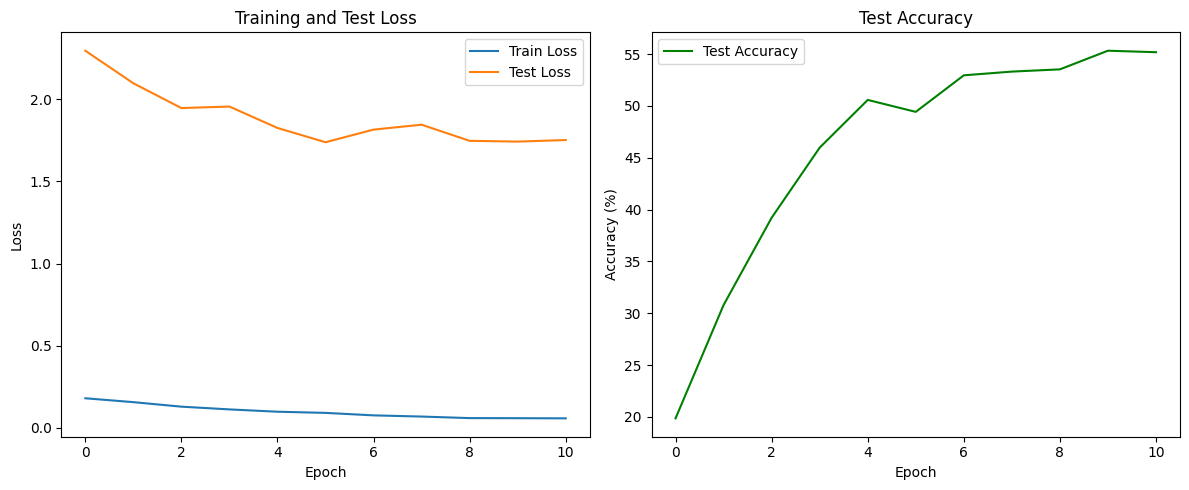

Finished Training!


<All keys matched successfully>

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_loop(dataloader, model, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels, _) in enumerate(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 20 == 19:
            print(f'[Batch {i + 1}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0
    return running_loss / len(dataloader)

def test_loop(dataloader, model, criterion):
    model.eval()
    total = 0
    correct = 0
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels, _ in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_loss /= len(dataloader)
    accuracy = 100 * correct / total
    print(f'Test Error: \n Accuracy: {accuracy:.1f}%, Avg loss: {test_loss:.3f} \n')
    return test_loss, accuracy

train_losses = []
test_losses = []
test_accuracies = []
best_loss = float('inf')
epochs_no_improve = 0
best_model_path = f'{data_dir}/best_model.pth'
epochs = 20
patience = 5

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}\n-------------------------------')
    train_loss = train_loop(train_dataloader, model, criterion, optimizer)
    test_loss, test_accuracy = test_loop(test_dataloader, model, criterion)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    if test_loss < best_loss:
        best_loss = test_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), best_model_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print('Finished Training!')
model.load_state_dict(torch.load(best_model_path))

In [12]:
!pip install pillow_heif

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.0 MB/s eta 0:00:00


##Dự đoán

In [15]:
import os
from google.colab import drive
import imghdr
import pillow_heif
from PIL import Image

# Kết nối Google Drive
drive.mount('/gdrive')

# Đường dẫn đến thư mục chứa dữ liệu giải nén
extract_dir = '/gdrive/MyDrive/project1/handwritten_digit_classification/cs114_hwdr'

# Lấy danh sách tất cả các file ảnh hợp lệ trong thư mục giải nén
test_image_paths = []
for root, _, files in os.walk(extract_dir):
    for file in files:
        file_path = os.path.join(root, file)
        # Kiểm tra xem file có phải là ảnh hợp lệ không
        try:
            if file.lower().endswith('.heic'):
                heif_file = pillow_heif.read_heif(file_path)
                test_image_paths.append(file_path)
            else:
                img = Image.open(file_path)
                img.close()
                test_image_paths.append(file_path)
        except Exception as e:
            print(f"Bỏ qua file không phải ảnh hoặc lỗi: {file_path} ({str(e)})")

print(f"Tìm thấy {len(test_image_paths)} file ảnh hợp lệ trong bộ dữ liệu kiểm tra.")
print("Ví dụ 5 file đầu tiên:", test_image_paths[:5])

/tmp/ipython-input-15-1757090334.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Bỏ qua file không phải ảnh hoặc lỗi: /gdrive/MyDrive/project1/handwritten_digit_classification/cs114_hwdr/b87d645ad38f9bc1c03dc90470138d69  -.md (cannot identify image file '/gdrive/MyDrive/project1/handwritten_digit_classification/cs114_hwdr/b87d645ad38f9bc1c03dc90470138d69  -.md')
Bỏ qua file không phải ảnh hoặc lỗi: /gdrive/MyDrive/project1/handwritten_digit_classification/cs114_hwdr/cbc4dc5a5e02031c9970b4ffc5112be4  -.md (cannot identify image file '/gdrive/MyDrive/project1/handwritten_digit_classification/cs114_hwdr/cbc4dc5a5e02031c9970b4ffc5112be4  -.md')
Bỏ qua file không phải ảnh hoặc lỗi: /gdrive/MyDrive/project1/handwritten_digit_classification/cs114_hwdr/dbb7bae06ac5acffe3c8912675c4bc14  -.md (cannot identify image file '/gdrive/MyDrive/project1/handwritten_digit_classification/cs114_hwdr/dbb7bae06ac5acffe3c8912675c4bc14  -.md')
Bỏ qua file không phải ảnh hoặc l

In [13]:
from torch.utils.data import Dataset
from PIL import Image
import torch
import pillow_heif

class TestImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            if img_path.lower().endswith('.heic'):
                heif_file = pillow_heif.read_heif(img_path)
                image = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data)
            else:
                image = Image.open(img_path)
            image = image.convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image, img_path
        except Exception as e:
            print(f"Lỗi khi đọc file {img_path}: {str(e)}")
            # Trả về ảnh rỗng và đường dẫn để không làm gián đoạn DataLoader
            return torch.zeros((3, 28, 28)), img_path

In [16]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F


transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = TestImageDataset(test_image_paths, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Tải mô hình đã huấn luyện
model_path = '/gdrive/MyDrive/project1/handwritten_digit_classification/best_model.pth'

class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)

        self.fc1 = nn.Linear(64 * 21 * 21, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNeuralNetwork()

state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Chuyển sang chế độ đánh giá
print("Mô hình đã được tải và sẵn sàng dự đoán!")

Mô hình đã được tải và sẵn sàng dự đoán!


In [ ]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import pillow_heif

transform = transforms.Compose([
    transforms.Resize((200, 200)), # Thay đổi kích thước resize
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

class TestImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            if img_path.lower().endswith('.heic'):
                heif_file = pillow_heif.read_heif(img_path)
                # Pass mode and stride explicitly if necessary, though frombytes often infers
                image = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data)
            else:
                image = Image.open(img_path)
            image = image.convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image, img_path
        except Exception as e:
            print(f"Lỗi khi đọc file {img_path}: {str(e)}")
            return torch.zeros((3, 200, 200)), img_path

test_dataset = TestImageDataset(test_image_paths, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Tải mô hình đã huấn luyện
model_path = '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/best_model.pth'


class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 21 * 21, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Tạo một instance (thể hiện) của lớp mô hình
model = ConvNeuralNetwork()

# Tải state_dict (các tham số đã học) vào instance mô hình vừa tạo
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Chuyển sang chế độ đánh giá
print("Mô hình đã được tải và sẵn sàng dự đoán!")

Mô hình đã được tải và sẵn sàng dự đoán!


In [ ]:
import os
import torch

predictions = []

with torch.no_grad():  # Tắt gradient để tăng tốc độ
    for batch_idx, (images, img_paths) in enumerate(test_loader):
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Lấy nhãn dự đoán
        for img_path, pred in zip(img_paths, predicted):
            filename = os.path.basename(img_path)
            predictions.append((filename, pred.item()))
        #print(f"Đã xử lý batch {batch_idx + 1}/{len(test_loader)}")

print(f"Đã dự đoán xong cho {len(predictions)} ảnh.")

Đã dự đoán xong cho 2928 ảnh.


In [ ]:
import csv

# Đường dẫn file CSV đầu ra
output_csv = '/gdrive/MyDrive/project1/handwritten_digit_classification/DATA/predictions.csv'

# Ghi kết quả vào file CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for filename, label in predictions:
        writer.writerow([filename, label])

print(f"Kết quả đã được lưu vào {output_csv}")

Kết quả đã được lưu vào /gdrive/MyDrive/project1/handwritten_digit_classification/DATA/predictions.csv


##Đánh giá Model

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Evaluation Metrics:


,Metric,Score
0,Accuracy,0.508124
1,F1-score,0.510098
2,Precision,0.536729
3,Recall,0.508124


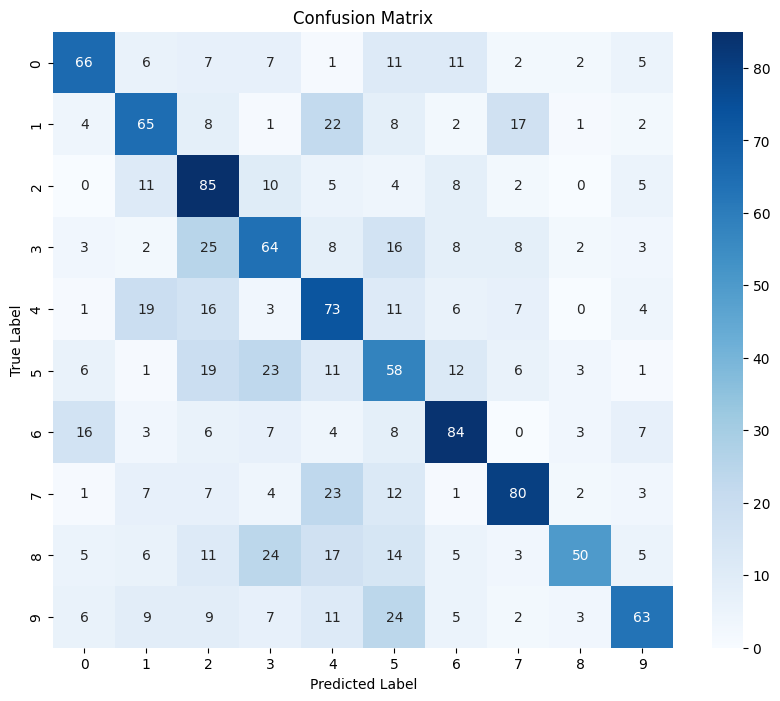

In [18]:
true_labels = []
predicted_labels = []

model.eval()

with torch.no_grad():
    for images, labels, _ in test_dataloader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(preds.cpu().numpy())

accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

metrics_data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
                'Score': [accuracy, f1, precision, recall]}
metrics_df = pd.DataFrame(metrics_data)
print("Evaluation Metrics:")
display(metrics_df)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()